# Introduction to Artificial Neural Networks

In [1]:
from __future__ import division, print_function, unicode_literals
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

def reset_graph(seed=42):
    tf.compat.v1.reset_default_graph()
    np.random.seed(seed)

# Perceptrons
- Linear Threshold Units

In [2]:
from sklearn .datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:,(2,3)]# petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=100, tol= - np.infty, random_state=42)
per_clf.fit(X,y)

y_pred = per_clf.predict([[2,0.5]])

In [3]:
y_pred

array([1])

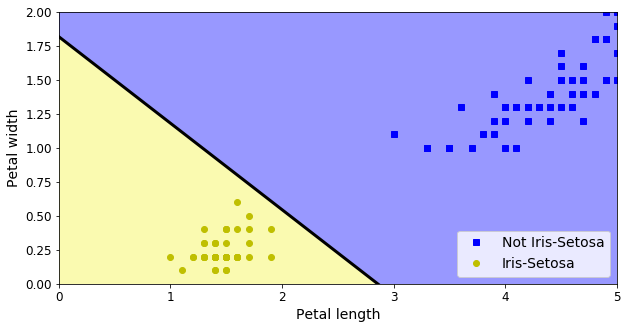

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_/ per_clf.coef_[0][1]

axes = [0,5,0,2]

x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1],500).reshape(-1,1),
    np.linspace(axes[2], axes[3],200).reshape(-1,1))

X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10,5))
plt.plot(X[y==0, 0], X[y==0, 1], 'bs', label='Not Iris-Setosa')
plt.plot(X[y==1,0],X[y==1,1], 'yo', label='Iris-Setosa')

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff','#fafab0'])

plt.contourf(x0,x1,zz, cmap=custom_cmap)
plt.xlabel('Petal length', fontsize=14)
plt.ylabel('Petal width', fontsize=14)
plt.legend(loc='lower right', fontsize=14)
plt.axis(axes)
plt.show()

# Activation Functions
- The hyperbolic tangent function tanh (z) = 2σ(2z) – 1 = Just like the logistic function it is S-shaped, 
  continuous, and differentiable, but its output value ranges from –1 to 1.

- The logistic function, σ(z) = 1 / (1 + exp(–z)). This is essential because the step function contains only flat segments,
  so there is no gradient to work with Gradient Descent cannot move on a flat surface.

- ReLU (z) = max (0, z). It is continuous but unfortunately not differentiable at z = 0
  the slope changes abruptly, which can make Gradient Descent bounce around.

In [5]:
def sigmoid(z):
    return 1 /  (1 +np.exp(-z))

def relu(z):
    return np.maximum(0, z)
#The rectifier is an activation function defined as the positive part of its argument.
# z is the input to the neuron.

def derivative(f, z, eps=0.000001):
    return(f(z + eps) - f(z - eps)) / (2 * eps)

[-5, 5, -0.2, 1.2]

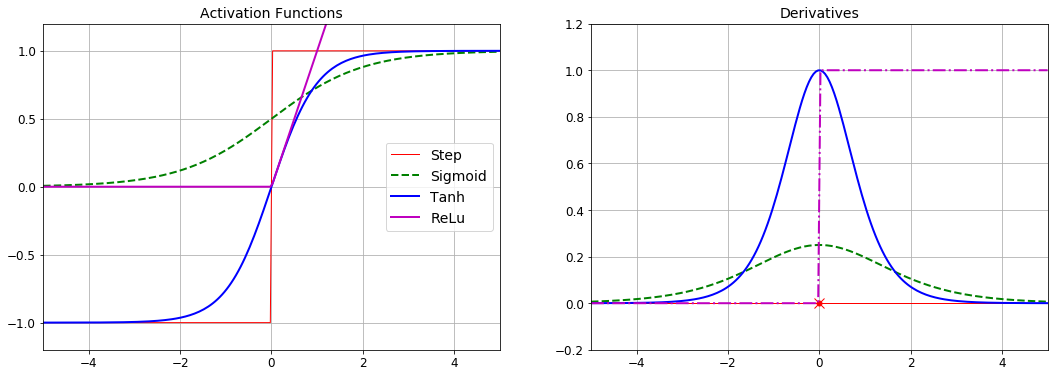

In [6]:
z = np.linspace(-5,5, 200)

plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(z, np.sign(z), 'r-', linewidth=1, label='Step')
plt.plot(z, sigmoid(z), 'g--', linewidth=2, label='Sigmoid')
plt.plot(z, np.tanh(z), 'b-', linewidth=2, label='Tanh')
plt.plot(z, relu(z), 'm-', linewidth=2, label='ReLu')
plt.grid(True)
plt.legend(loc='center right', fontsize=14)
plt.title('Activation Functions', fontsize=14)
plt.axis([-5,5,-1.2,1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z),'r-', linewidth=1, label='Step')
plt.plot(0,0,'ro', markersize=5)
plt.plot(0,0,'rx', markersize=10)

plt.plot(z, derivative(sigmoid, z), 'g--', linewidth=2, label='Sigmoid')
plt.plot(z, derivative(np.tanh, z), 'b-', linewidth=2, label='Tanh')
plt.plot(z, derivative(relu, z),'m-.', linewidth=2, label='ReLu')
plt.grid(True)
plt.title('Derivatives', fontsize=14)
plt.axis([-5,5,-0.2,1.2])

# Heaviside aka Sign Function & XOR
- Computes a linear combination of the inputs and if the result exceeds a threshold, it outputs the positive class or else outputs the negative class.
- Serious weaknesses of Perceptrons, in particular the fact that they are incapable of solving some trivial problems (e.g., the Exclusive OR (XOR) classification problem.
- This problem was eliminated by stacking multiple Perceptrons,each combination of inputs: with inputs (0, 0) or (1, 1) the network outputs 0, and with inputs (0, 1) or (1, 0) it outputs 1.

In [7]:
def heaviside(z):
    return(z >= 0).astype(z.dtype)

def mlp_xor(x1,x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) -0.5)

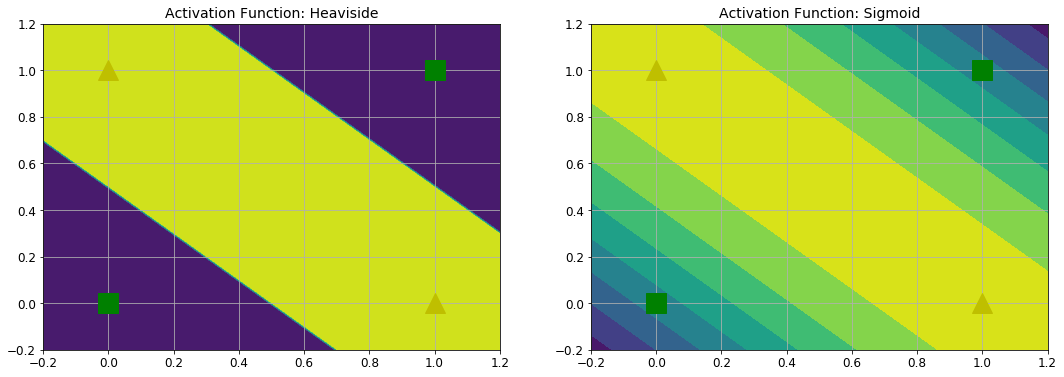

In [8]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2,1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(18,6))
plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0,1],[0,1], 'gs', markersize=20)
plt.plot([0,1],[1,0], 'y^', markersize=20)
plt.title('Activation Function: Heaviside', fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0,1],[0,1], 'gs', markersize=20)
plt.plot([0,1],[1,0], 'y^', markersize=20)
plt.title('Activation Function: Sigmoid', fontsize=14)
plt.grid(True)

# Training an MLP with TensorFlow's High-Level API - Using the Estimator(tf.contrib.learn)

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.1.0


In [10]:
from tensorflow.keras.datasets import mnist

(X_train, y_train) ,(X_test,y_test) = mnist.load_data()

In [11]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [12]:
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                     feature_columns=feature_cols)

input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)
dnn_clf.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\User\\AppData\\Local\\Temp\\tmpk8d89eh2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
In

INFO:tensorflow:global_step/sec: 295.773
INFO:tensorflow:loss = 0.29943538, step = 4700 (0.341 sec)
INFO:tensorflow:global_step/sec: 293.18
INFO:tensorflow:loss = 0.22325544, step = 4800 (0.339 sec)
INFO:tensorflow:global_step/sec: 335.339
INFO:tensorflow:loss = 0.46859848, step = 4900 (0.298 sec)
INFO:tensorflow:global_step/sec: 335.347
INFO:tensorflow:loss = 0.23866414, step = 5000 (0.298 sec)
INFO:tensorflow:global_step/sec: 350.581
INFO:tensorflow:loss = 0.20778042, step = 5100 (0.285 sec)
INFO:tensorflow:global_step/sec: 349.621
INFO:tensorflow:loss = 0.4026959, step = 5200 (0.285 sec)
INFO:tensorflow:global_step/sec: 349.659
INFO:tensorflow:loss = 0.4025716, step = 5300 (0.288 sec)
INFO:tensorflow:global_step/sec: 345.748
INFO:tensorflow:loss = 0.29401472, step = 5400 (0.287 sec)
INFO:tensorflow:global_step/sec: 351.816
INFO:tensorflow:loss = 0.37025967, step = 5500 (0.284 sec)
INFO:tensorflow:global_step/sec: 343.377
INFO:tensorflow:loss = 0.30137652, step = 5600 (0.292 sec)
INF

INFO:tensorflow:global_step/sec: 338.74
INFO:tensorflow:loss = 0.42811343, step = 12900 (0.297 sec)
INFO:tensorflow:global_step/sec: 351.816
INFO:tensorflow:loss = 0.2774668, step = 13000 (0.284 sec)
INFO:tensorflow:global_step/sec: 291.039
INFO:tensorflow:loss = 0.43859628, step = 13100 (0.346 sec)
INFO:tensorflow:global_step/sec: 302.917
INFO:tensorflow:loss = 0.30326834, step = 13200 (0.327 sec)
INFO:tensorflow:global_step/sec: 351.623
INFO:tensorflow:loss = 0.47335285, step = 13300 (0.285 sec)
INFO:tensorflow:global_step/sec: 351.815
INFO:tensorflow:loss = 0.15908724, step = 13400 (0.283 sec)
INFO:tensorflow:global_step/sec: 354.303
INFO:tensorflow:loss = 0.33975273, step = 13500 (0.282 sec)
INFO:tensorflow:global_step/sec: 348.148
INFO:tensorflow:loss = 0.20531294, step = 13600 (0.289 sec)
INFO:tensorflow:global_step/sec: 349.365
INFO:tensorflow:loss = 0.123344794, step = 13700 (0.284 sec)
INFO:tensorflow:global_step/sec: 350.586
INFO:tensorflow:loss = 0.29043338, step = 13800 (0.

INFO:tensorflow:loss = 0.33598936, step = 21000 (0.294 sec)
INFO:tensorflow:global_step/sec: 341.046
INFO:tensorflow:loss = 0.3510137, step = 21100 (0.295 sec)
INFO:tensorflow:global_step/sec: 352.415
INFO:tensorflow:loss = 0.15570728, step = 21200 (0.283 sec)
INFO:tensorflow:global_step/sec: 348.15
INFO:tensorflow:loss = 0.14647657, step = 21300 (0.287 sec)
INFO:tensorflow:global_step/sec: 290.631
INFO:tensorflow:loss = 0.19966398, step = 21400 (0.346 sec)
INFO:tensorflow:global_step/sec: 306.146
INFO:tensorflow:loss = 0.4113637, step = 21500 (0.325 sec)
INFO:tensorflow:global_step/sec: 351.283
INFO:tensorflow:loss = 0.094833404, step = 21600 (0.291 sec)
INFO:tensorflow:global_step/sec: 345.073
INFO:tensorflow:loss = 0.29110765, step = 21700 (0.283 sec)
INFO:tensorflow:global_step/sec: 352.42
INFO:tensorflow:loss = 0.14014259, step = 21800 (0.284 sec)
INFO:tensorflow:global_step/sec: 343.169
INFO:tensorflow:loss = 0.19653885, step = 21900 (0.291 sec)
INFO:tensorflow:global_step/sec: 3

INFO:tensorflow:global_step/sec: 313.001
INFO:tensorflow:loss = 0.16544166, step = 29200 (0.322 sec)
INFO:tensorflow:global_step/sec: 336.466
INFO:tensorflow:loss = 0.13753279, step = 29300 (0.295 sec)
INFO:tensorflow:global_step/sec: 339.818
INFO:tensorflow:loss = 0.39751762, step = 29400 (0.294 sec)
INFO:tensorflow:global_step/sec: 338.741
INFO:tensorflow:loss = 0.26232594, step = 29500 (0.293 sec)
INFO:tensorflow:global_step/sec: 312.148
INFO:tensorflow:loss = 0.22794758, step = 29600 (0.323 sec)
INFO:tensorflow:global_step/sec: 349.368
INFO:tensorflow:loss = 0.12224531, step = 29700 (0.284 sec)
INFO:tensorflow:global_step/sec: 312.36
INFO:tensorflow:loss = 0.06803577, step = 29800 (0.321 sec)
INFO:tensorflow:global_step/sec: 294.872
INFO:tensorflow:loss = 0.3188186, step = 29900 (0.341 sec)
INFO:tensorflow:global_step/sec: 332.301
INFO:tensorflow:loss = 0.13143186, step = 30000 (0.299 sec)
INFO:tensorflow:global_step/sec: 342.209
INFO:tensorflow:loss = 0.1578964, step = 30100 (0.29

INFO:tensorflow:loss = 0.21261132, step = 37300 (0.297 sec)
INFO:tensorflow:global_step/sec: 343.217
INFO:tensorflow:loss = 0.10649599, step = 37400 (0.289 sec)
INFO:tensorflow:global_step/sec: 349.366
INFO:tensorflow:loss = 0.31304798, step = 37500 (0.287 sec)
INFO:tensorflow:global_step/sec: 351.816
INFO:tensorflow:loss = 0.28823337, step = 37600 (0.284 sec)
INFO:tensorflow:global_step/sec: 353.051
INFO:tensorflow:loss = 0.21276493, step = 37700 (0.283 sec)
INFO:tensorflow:global_step/sec: 345.135
INFO:tensorflow:loss = 0.10083062, step = 37800 (0.290 sec)
INFO:tensorflow:global_step/sec: 354.302
INFO:tensorflow:loss = 0.32399482, step = 37900 (0.283 sec)
INFO:tensorflow:global_step/sec: 349.359
INFO:tensorflow:loss = 0.25968534, step = 38000 (0.293 sec)
INFO:tensorflow:global_step/sec: 326.054
INFO:tensorflow:loss = 0.0974568, step = 38100 (0.299 sec)
INFO:tensorflow:global_step/sec: 327.671
INFO:tensorflow:loss = 0.2297717, step = 38200 (0.307 sec)
INFO:tensorflow:global_step/sec: 

In [13]:
test_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-02-08T22:33:19Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\User\AppData\Local\Temp\tmpk8d89eh2\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.87267s
INFO:tensorflow:Finished evaluation at 2020-02-08-22:33:19
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9497, average_loss = 0.1774514, global_step = 44000, loss = 0.1766862
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 44000: C:\Users\User\AppData\Local\Temp\tmpk8d89eh2\model.ckpt-44000


In [14]:
eval_results

{'accuracy': 0.9497,
 'average_loss': 0.1774514,
 'loss': 0.1766862,
 'global_step': 44000}

In [15]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\User\AppData\Local\Temp\tmpk8d89eh2\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'logits': array([-0.02233019, -4.617967  ,  1.1207021 ,  2.8522968 , -4.0099673 ,
        -1.2066368 , -6.5787454 ,  9.077425  , -0.91207707,  1.9642804 ],
       dtype=float32),
 'probabilities': array([1.1132145e-04, 1.1238774e-06, 3.4913357e-04, 1.9724844e-03,
        2.0642860e-06, 3.4059733e-05, 1.5818460e-07, 9.9667227e-01,
        4.5726381e-05, 8.1162015e-04], dtype=float32),
 'class_ids': array([7], dtype=int64),
 'classes': array([b'7'], dtype=object),
 'all_class_ids': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'all_classes': array([b'0', b'1', b'2', b'3', b'4', b'5', b'6', b'7', b'8', b'9'],
       dtype=object)}

# Keras Model for Tensorflow 2.1 using mnist

In [16]:
np.random.seed(42)
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
estimator = tf.estimator.DNNClassifier(
    feature_columns= feature_cols,
    hidden_units=[300,100], n_classes=10,
    optimizer=tf.compat.v1.train.ProximalAdagradOptimizer(
      learning_rate=0.1,
      l1_regularization_strength=0.001
    ))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\User\\AppData\\Local\\Temp\\tmpn86tb2m9', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


# Using GradientTape with MNIST dataset      

In [17]:
import tensorflow as tf
tf.compat.v1.enable_eager_execution()

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#Preprocess the data using Numpy arrays
x_train = x_train.reshape(60000,784).astype('float32') / 255
x_test = x_test.reshape(10000,784).astype('float32') / 255

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

#Reserve 10000 samples for Validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [18]:
# Get model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(784,), name='Numbers')
x = layers.Dense(300, activation='relu', name='dense_1')(inputs)
x = layers.Dense(100, activation='relu', name='dense_2')(x)
outputs = layers.Dense(10, name='Predictions')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

#Instantiate an optimizer to train the model
optimizer = keras.optimizers.SGD(learning_rate=0.01)

#Instantiate a loss function
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

#Prepare the metrics
train_acc_metric = keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = keras.metrics.SparseCategoricalAccuracy()

#Prepare the training dataset.
batch_size = 50
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

#Prepare the validation dataset
val_dataset = tf.data.Dataset.from_tensor_slices((x_val,y_val))
val_dataset = val_dataset.batch(batch_size)

In [20]:
# Running a training loop for a few epochs
epochs = 3
for epoch in range(epochs):
    print('Start of Epoch %d'%(epoch,))
    
    #Iterate over the batches of the dataset
    for step,(x_batch_train, y_batch_train) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            logits = model(x_batch_train)
            loss_value = loss_fn(y_batch_train, logits)
        grads = tape.gradient(loss_value, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))
        
    #Update training metric
    train_acc_metric(y_batch_train, logits)
    
    #Log every 200 batches.
    if step % 200 == 0:
        print('Training loss(for one batch) at step %s: %s'%(step, float(loss_value)))
        print('Seen so far: %s samples'%((step + 1) * 50))
        
    #Display metrics at the end of each epoch
    train_acc = train_acc_metric.result()
    print('Training acc over epoch: %s' % (float(train_acc),))
    
  # Reset training metrics at the end of each epoch
    train_acc_metric.reset_states()
    # Run a validation loop at the end of each epoch.
    for x_batch_val, y_batch_val in val_dataset:
        val_logits = model(x_batch_val)
    
    # Update val metrics
        val_acc_metric(y_batch_val, val_logits)
    val_acc = val_acc_metric.result()
    val_acc_metric.reset_states()
    print('Validation acc: %s' % (float(val_acc),)) 

Start of Epoch 0
Training acc over epoch: 0.9100000262260437
Validation acc: 0.9197999835014343
Start of Epoch 1
Training acc over epoch: 0.8799999952316284
Validation acc: 0.9294000267982483
Start of Epoch 2
Training acc over epoch: 0.9599999785423279
Validation acc: 0.9377999901771545


In [21]:
from tensorflow import keras
from tensorflow.keras import layers
tf.compat.v1.disable_eager_execution()

inputs = keras.Input(shape=(784,), name='img')
x = layers.Dense(300, activation='relu')(inputs)
x = layers.Dense(100, activation='relu')(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs=inputs, outputs=outputs, name='mnist_model')

In [22]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [23]:
from keras.utils.vis_utils import plot_model
keras.utils.plot_model(model, 'my_first_model.png')

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


Using TensorFlow backend.


In [24]:
keras.utils.plot_model(model, 'my_first_model_with_shape_info.png', show_shapes=True )

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [25]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
y_test = x_test.reshape(10000, 784).astype('float32') / 255

In [26]:
model.compile(loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer = keras.optimizers.RMSprop(),
             metrics = ['accuracy'])

In [27]:
tf.compat.v1.disable_eager_execution()
history = model.fit(x_train, y_train,batch_size=50, epochs=5, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 6s 133us/sample - loss: 0.2350 - accuracy: 0.9296 - val_loss: 0.1252 - val_accuracy: 0.9631
Epoch 2/5
48000/48000 [==============================] - 6s 117us/sample - loss: 0.0977 - accuracy: 0.9698 - val_loss: 0.0972 - val_accuracy: 0.9730
Epoch 3/5
48000/48000 [==============================] - 5s 105us/sample - loss: 0.0657 - accuracy: 0.9800 - val_loss: 0.1079 - val_accuracy: 0.9724
Epoch 4/5
48000/48000 [==============================] - 7s 140us/sample - loss: 0.0507 - accuracy: 0.9851 - val_loss: 0.0943 - val_accuracy: 0.9754
Epoch 5/5
48000/48000 [==============================] - 5s 110us/sample - loss: 0.0391 - accuracy: 0.9888 - val_loss: 0.1121 - val_accuracy: 0.9762


In [28]:
history.history

{'loss': [0.23503931401355657,
  0.09766097635753491,
  0.06566684174140391,
  0.050692550601767535,
  0.039135240936260134],
 'accuracy': [0.929625, 0.96979165, 0.9800417, 0.985125, 0.98877084],
 'val_loss': [0.12519607118253287,
  0.09717651313403622,
  0.10785932825286484,
  0.09428507401025854,
  0.11212578174672672],
 'val_accuracy': [0.9630833, 0.973, 0.97241664, 0.97541666, 0.97616667]}

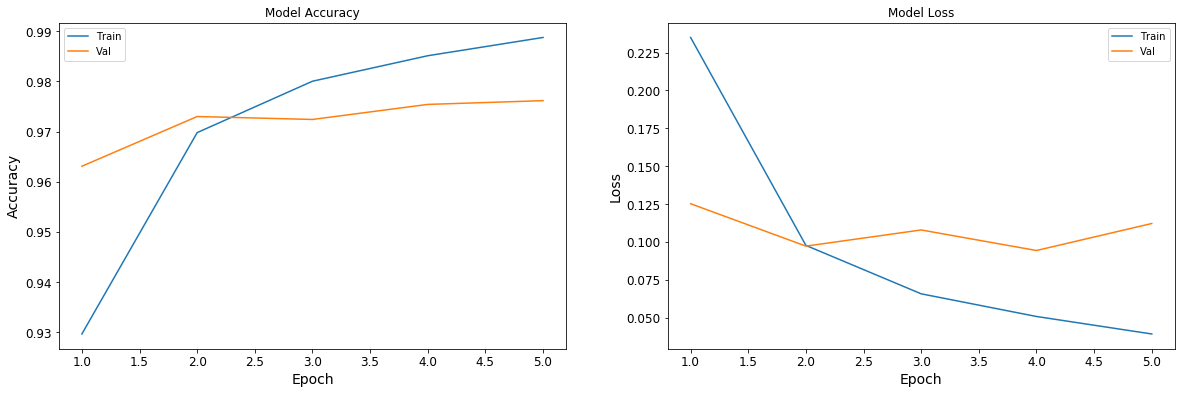

In [29]:
plt.figure(figsize=(20,6))
plt.subplot(121)
epoch_range = range(1,6)
plt.plot(epoch_range,history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper left')

plt.subplot(122)
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

# Using Plain Tensorflow

In [30]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

print(tf.__version__)

n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

2.1.0


In [31]:
reset_graph()

X = tf.compat.v1.placeholder(tf.float32, shape=(None, n_inputs), name = 'X')
y = tf.compat.v1.placeholder(tf.int32, shape=(None), name = 'Y')

In [32]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.random.truncated_normal((n_inputs, n_neurons), stddev)
        W = tf.Variable(init, name='kernel')
        b = tf.Variable(tf.zeros([n_neurons]), name='bias')
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [33]:
with tf.name_scope('dnn'):
    hidden1 = neuron_layer(X, n_hidden1, name='hidden1', activation = tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name='hidden2', activation = tf.nn.relu)
    
    logits = neuron_layer(hidden2, n_outputs, name='outputs')
    print(logits)

Tensor("dnn/outputs/add:0", shape=(None, 10), dtype=float32)


In [34]:
with tf.name_scope('loss'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits)
    loss = tf.reduce_mean(xentropy, name='loss')

In [35]:
learning_rate = 0.01

with tf.name_scope('train'):
    optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [36]:
with tf.name_scope('eval'):
    correct = tf.math.top_k(logits, sorted=True, name = None)
    correct = tf.cast(correct[1], tf.float32)
    accuracy = tf.reduce_mean(correct)

In [37]:
init = tf.compat.v1.global_variables_initializer()
saver = tf.compat.v1.train.Saver()

In [38]:
n_epochs = 3
batch_size = 50

def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [39]:
with tf.compat.v1.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op,feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Val accuracy:", acc_val)

0 Batch accuracy: 1.0 Val accuracy: 1.0238
1 Batch accuracy: 1.0 Val accuracy: 1.015
2 Batch accuracy: 1.0 Val accuracy: 1.0156


In [40]:
# with tf.compat.v1.Session() as sess:
#     saver.restore(sess,'C:/Users/User/TensorFlow_1')
#     X_scaled = X_test[:20]
#     Z = logits.eval(feed_dict={X : X_new_scaled})
#     y_pred = np.argmax(Z, axis=1)

In [41]:
# print('Predicted classes: ', y_pred)
# print('Actual classes: ', y_test[:20])

# Using Built-in-Training & Evaluation
- Using dense() instead of neuron_layer()

In [42]:
%load_ext tensorboard
tf.compat.v1.disable_eager_execution()

reset_graph()

n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [43]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(784,), name='digits')
x = layers.Dense(300, activation='relu', name='hidden_1')(inputs)
x = layers.Dense(100, activation='relu', name='hidden_2')(x)
outputs = layers.Dense(10, name='predictions')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [44]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#Preprocess the data using Numpy arrays
x_train = x_train.reshape(60000,784).astype('float32') / 255
x_test = x_test.reshape(10000,784).astype('float32') / 255

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

#Reserve 10000 samples for Validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [45]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
             loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['sparse_categorical_accuracy'])

In [46]:
batch_size= 50
epochs = 5
print('Fit model on training data')
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val,y_val))

Fit model on training data
Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 5s 93us/sample - loss: 0.3346 - sparse_categorical_accuracy: 0.9021 - val_loss: 0.1624 - val_sparse_categorical_accuracy: 0.9546
Epoch 2/5
50000/50000 [==============================] - 4s 73us/sample - loss: 0.1403 - sparse_categorical_accuracy: 0.9588 - val_loss: 0.1140 - val_sparse_categorical_accuracy: 0.9681
Epoch 3/5
50000/50000 [==============================] - 4s 78us/sample - loss: 0.0947 - sparse_categorical_accuracy: 0.9713 - val_loss: 0.0981 - val_sparse_categorical_accuracy: 0.9717
Epoch 4/5
50000/50000 [==============================] - 5s 99us/sample - loss: 0.0702 - sparse_categorical_accuracy: 0.9787 - val_loss: 0.0878 - val_sparse_categorical_accuracy: 0.9727
Epoch 5/5
50000/50000 [==============================] - 4s 81us/sample - loss: 0.0530 - sparse_categorical_accuracy: 0.9841 - val_loss: 0.0756 - val_sparse_categorical_accuracy: 

In [47]:
print('\nHistory Dict: ', history.history)


History Dict:  {'loss': [0.33460090040042995, 0.14030933250393718, 0.09473239760939031, 0.07024150555953383, 0.05304423249408137], 'sparse_categorical_accuracy': [0.90212, 0.95884, 0.97128, 0.97872, 0.9841], 'val_loss': [0.16238609647378324, 0.1139791099820286, 0.09808545294916257, 0.08782596644363366, 0.07555470212362707], 'val_sparse_categorical_accuracy': [0.9546, 0.9681, 0.9717, 0.9727, 0.9773]}


In [48]:
# Evaluate the model on the test data using 'Evaluate'
print('\nEvaluate on the test data')
results = model.evaluate(x_test,y_test)


Evaluate on the test data
10000/10000 [==============================] - 1s 108us/sample - loss: 0.0750 - sparse_categorical_accuracy: 0.9757s - loss: 0.0971 - sparse_categorical_accuracy: 0.96 - ETA: 2s - loss: 0.1100 - sparse_categorical_accu


In [49]:
#Generate predictions using Predict
print('\nGenerate predictions for 3 samples')
predictions = model.predict(x_test[:3])
print('Predictions shape: ', predictions.shape)


Generate predictions for 3 samples
Predictions shape:  (3, 10)


# Creating Functions for Compiling

In [50]:
def get_uncompiled_model():
    inputs = keras.Input(shape=(784), name='digits')
    x = layers.Dense(300, activation='relu', name='hidden_1')(inputs)
    x = layers.Dense(100, activation='relu', name='hidden_2')(x)
    outputs = layers.Dense(10, name='Predictions')(x)
    model  = keras.Model(inputs=inputs, outputs=outputs)
    return model

def get_compiled_model():
    model = get_uncompiled_model()
    model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                 loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics = ['sparse_categorical_accuracy'])
    return model

# Training & Evaluation from tf.data Datasets

In [51]:
model = get_compiled_model()

train_dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train))
#Shuffle and slice the dataset
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(50)

#Now we get a test dataset.
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(50)

model.fit(train_dataset, epochs=3)

Train on 1000 steps
Epoch 1/3
1000/1000 [==============================] - 5s 5ms/step - loss: 0.3418 - sparse_categorical_accuracy: 0.9018
Epoch 2/3
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1446 - sparse_categorical_accuracy: 0.9575
Epoch 3/3
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0996 - sparse_categorical_accuracy: 0.9707


In [52]:
print('\nEvaluate the dataset')
result = model.evaluate(test_dataset)


Evaluate the dataset
200/200 [==============================] - 2s 8ms/step - loss: 0.1106 - sparse_categorical_accuracy: 0.9658A: 1s - loss: 0.1503 - sparse_categorical_ac


# Using a Validation dataset

In [53]:
model = get_compiled_model()

#Prepare the training dataset
train_dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(50)

#Prepare the validation dataset
val_dataset = tf.data.Dataset.from_tensor_slices((x_val,y_val))
val_dataset = val_dataset.batch(50)

model.fit(train_dataset, epochs=3, validation_data=val_dataset)

Train on 1000 steps, validate on 200 steps
Epoch 1/3
1000/1000 [==============================] - 9s 9ms/step - loss: 0.3370 - sparse_categorical_accuracy: 0.9025 - val_loss: 0.1607 - val_sparse_categorical_accuracy: 0.9548
Epoch 2/3
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1399 - sparse_categorical_accuracy: 0.9580 - val_loss: 0.1335 - val_sparse_categorical_accuracy: 0.9619
Epoch 3/3
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0948 - sparse_categorical_accuracy: 0.9720 - val_loss: 0.1003 - val_sparse_categorical_accuracy: 0.9693


# Passing data to multi-input, multi-output models

In [62]:
from tensorflow import keras
from tensorflow.keras import layers

image_input = keras.Input(shape=(32,32,3), name='img_input')
timeseries_input = keras.Input(shape=(None, 10), name='ts_input')

x1 = layers.Conv2D(3,3)(image_input)
x1 = layers.GlobalMaxPooling2D()(x1)

x2 = layers.Conv1D(3,3)(timeseries_input)
x2 = layers.GlobalMaxPooling1D()(x2)

x = layers.concatenate([x1, x2])

score_output = layers.Dense(1, name='score_output')(x)
class_output = layers.Dense(5, name='class_output')(x)

model = keras.Model(inputs=[image_input, timeseries_input],
                   outputs=[score_output, class_output])

In [66]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss={'score_output': keras.losses.MeanSquaredError(),
          'class_output': keras.losses.CategoricalCrossentropy(from_logits=True)},
    metrics={'score_output': [keras.metrics.MeanAbsolutePercentageError(),
                              keras.metrics.MeanAbsoluteError()],
             'class_output': [keras.metrics.CategoricalAccuracy()]})


In [69]:
# model.fit({'img_input': image_input, 'ts_input': timeseries_input},
#           {'score_output': score_output, 'class_output': class_output},
#           batch_size=50,steps_per_epoch=1,epochs=2)


